 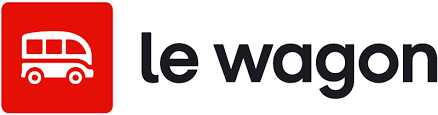

# Shop orders analysis

In this challenge, you will analyze data from [Sumup](https://www.sumup.com/fr-fr/) who wants to analyse its restaurant orders and categorize them.


Upload [Tiller_order_data.csv](https://drive.google.com/file/d/1dVuD1hB3UnX5xhCHFMQ5R4iBdMdJMK4a/view?usp=sharing) in Colab and load it in a DataFrame `df_order`


## Exploratory Analysis


In [ ]:
#your code here
import pandas as pd

df_order=pd.read_csv("Tiller_order_data.csv")
df_order

<ipython-input-1-e7851f4652c6>:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_order=pd.read_csv("Tiller_order_data.csv")


,id_order,id_store,id_table,id_waiter,id_customer,id_external,id_device,date_opened,date_closed,dim_name,dim_status,dim_type,dim_comment,dim_source,m_nb_customer,m_cached_payed,m_cached_price
0,55538867,8052,NaN,NaN,NaN,0425716B-EFF4-41CA-AEA1-839104F36833,15327.0,2019-01-12 13:02:17 UTC,2019-01-12 19:58:38 UTC,vincent,CLOSED,1,NaN,Tiller iPAD,1,45.5,45.5
1,56035309,8052,NaN,NaN,NaN,75E41FE2-64FF-41D3-954C-A7DE4AA887EF,15327.0,2019-01-16 19:39:09 UTC,2019-01-16 22:10:50 UTC,frere et soeur avec pierre,CLOSED,1,NaN,Tiller iPAD,2,49.8,49.8
2,55550051,8052,NaN,NaN,NaN,F6051A05-C9AC-4033-BF72-BB5149B8F439,15327.0,2019-01-12 14:18:46 UTC,2019-01-12 19:50:32 UTC,rachel,CLOSED,1,NaN,Tiller iPAD,1,27.4,27.4
3,57000119,8052,NaN,16199.0,NaN,B8BEEC66-1C10-48A0-B4D5-035CB5EEFE62,15327.0,2019-01-24 17:49:12 UTC,2019-01-24 21:58:59 UTC,Groupe PEL,CLOSED,1,NaN,tiller-order,3,60.0,60.0
4,55558817,8052,NaN,NaN,NaN,17F0533C-2FF1-4FC5-A50D-12704C7B7A4B,15327.0,2019-01-12 15:25:06 UTC,2019-01-12 19:21:03 UTC,remi et date,CLOSED,1,NaN,Tiller iPAD,2,39.9,39.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117299,61630471,4542,NaN,NaN,NaN,C4A0AFD8-FBD7-4740-A48B-4890F46E43E2,7411.0,2019-02-28 13:13:21 UTC,2019-02-28 13:38:45 UTC,NaN,CLOSED,1,NaN,Tiller iPAD,1,23.0,23.0
117300,76772730,4542,NaN,NaN,NaN,95A17B0B-22AE-43A1-8BEB-B105BF337655,7411.0,2019-06-11 11:08:01 UTC,2019-06-11 11:10:26 UTC,NaN,CLOSED,1,NaN,Tiller iPAD,1,26.0,26.0
117301,77799227,4542,NaN,NaN,NaN,0E5D4843-7EA3-4D9E-9490-EB9717A0220F,7411.0,2019-06-17 10:30:50 UTC,2019-06-17 10:32:45 UTC,NaN,CLOSED,1,NaN,Tiller iPAD,1,29.0,29.0
117302,60627160,4542,NaN,NaN,NaN,CE760A3B-4464-462A-AA2C-CCFEB88EEC39,7411.0,2019-02-21 11:50:58 UTC,2019-02-21 11:51:56 UTC,NaN,CLOSED,1,NaN,Tiller iPAD,1,32.0,32.0


What does a row represent? What information can you find?

> **Your Answer Here (Double click)**


What are the different statuses of an order? How many orders are there per status?   

In [ ]:
#your code here
print(f"Statuses: {df_order['dim_status'].unique()}")
df_order['dim_status'].value_counts()

Statuses: ['CLOSED' 'IN_PROGRESS']


CLOSED         116939
IN_PROGRESS       365
Name: dim_status, dtype: int64

What is the proportion of orders ?  \
You can use the `.value_counts()` function, with the optional argument `normalize=True`

In [ ]:
#your code here
df_order['dim_status'].value_counts(normalize=True)

CLOSED         0.996888
IN_PROGRESS    0.003112
Name: dim_status, dtype: float64

How many restaurants are there? What are their ids?

In [ ]:
#your code here
print(df_order["id_store"].nunique())
print(df_order["id_store"].unique())

10
[8052 8347 8283 9084 4337  360 1796 7965 6293 4542]


## Aggregations

Compute the total turnover per restaurant. Which restaurant has the highest turnover?


In [ ]:
#your code here

df_order.groupby("id_store")["m_cached_payed"].sum().sort_values(ascending=False)

id_store
7965    1138690.95
4337     865357.89
9084     479019.75
360      387089.14
8283     369822.82
6293     359471.00
8052     327758.85
1796     321099.69
4542     243728.69
8347         23.00
Name: m_cached_payed, dtype: float64

> **Your Answer Here (Double click)**

Count the number of orders per restaurant. Which restaurant has the most orders? Is it the same as the one with the highest turnover?


In [ ]:
#your code here
df_order.groupby("id_store")["id_order"].count().sort_values(ascending=False)

id_store
1796    27349
4337    20003
4542    17641
6293    16103
8283    10023
7965     9091
9084     7804
8052     4906
360      4383
8347        1
Name: id_order, dtype: int64

Calculate the average price of an order for each restaurant. Do you think you are dealing with similar categories of restaurants ?


In [ ]:
#your code here
df_order.groupby("id_store")["m_cached_payed"].mean().sort_values(ascending=False)

id_store
7965    125.254752
360      88.316026
8052     66.807756
9084     61.381311
4337     43.261405
8283     36.897418
8347     23.000000
6293     22.323232
4542     13.816036
1796     11.740820
Name: m_cached_payed, dtype: float64

## Column transformations


The problem is that an order may be placed for several people. Instead, we want to know the average price spent by a single person in the restaurant.

Add a column to `df_order`,  representing the price per customer for each order.


In [ ]:
#your code here
df_order['price_per_customer']=df_order["m_cached_payed"]/df_order["m_nb_customer"]
df_order

,id_order,id_store,id_table,id_waiter,id_customer,id_external,id_device,date_opened,date_closed,dim_name,dim_status,dim_type,dim_comment,dim_source,m_nb_customer,m_cached_payed,m_cached_price,price_per_customer
0,55538867,8052,NaN,NaN,NaN,0425716B-EFF4-41CA-AEA1-839104F36833,15327.0,2019-01-12 13:02:17 UTC,2019-01-12 19:58:38 UTC,vincent,CLOSED,1,NaN,Tiller iPAD,1,45.5,45.5,45.50
1,56035309,8052,NaN,NaN,NaN,75E41FE2-64FF-41D3-954C-A7DE4AA887EF,15327.0,2019-01-16 19:39:09 UTC,2019-01-16 22:10:50 UTC,frere et soeur avec pierre,CLOSED,1,NaN,Tiller iPAD,2,49.8,49.8,24.90
2,55550051,8052,NaN,NaN,NaN,F6051A05-C9AC-4033-BF72-BB5149B8F439,15327.0,2019-01-12 14:18:46 UTC,2019-01-12 19:50:32 UTC,rachel,CLOSED,1,NaN,Tiller iPAD,1,27.4,27.4,27.40
3,57000119,8052,NaN,16199.0,NaN,B8BEEC66-1C10-48A0-B4D5-035CB5EEFE62,15327.0,2019-01-24 17:49:12 UTC,2019-01-24 21:58:59 UTC,Groupe PEL,CLOSED,1,NaN,tiller-order,3,60.0,60.0,20.00
4,55558817,8052,NaN,NaN,NaN,17F0533C-2FF1-4FC5-A50D-12704C7B7A4B,15327.0,2019-01-12 15:25:06 UTC,2019-01-12 19:21:03 UTC,remi et date,CLOSED,1,NaN,Tiller iPAD,2,39.9,39.9,19.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117299,61630471,4542,NaN,NaN,NaN,C4A0AFD8-FBD7-4740-A48B-4890F46E43E2,7411.0,2019-02-28 13:13:21 UTC,2019-02-28 13:38:45 UTC,NaN,CLOSED,1,NaN,Tiller iPAD,1,23.0,23.0,23.00
117300,76772730,4542,NaN,NaN,NaN,95A17B0B-22AE-43A1-8BEB-B105BF337655,7411.0,2019-06-11 11:08:01 UTC,2019-06-11 11:10:26 UTC,NaN,CLOSED,1,NaN,Tiller iPAD,1,26.0,26.0,26.00
117301,77799227,4542,NaN,NaN,NaN,0E5D4843-7EA3-4D9E-9490-EB9717A0220F,7411.0,2019-06-17 10:30:50 UTC,2019-06-17 10:32:45 UTC,NaN,CLOSED,1,NaN,Tiller iPAD,1,29.0,29.0,29.00
117302,60627160,4542,NaN,NaN,NaN,CE760A3B-4464-462A-AA2C-CCFEB88EEC39,7411.0,2019-02-21 11:50:58 UTC,2019-02-21 11:51:56 UTC,NaN,CLOSED,1,NaN,Tiller iPAD,1,32.0,32.0,32.00


Using the previous column, calculate the average price spent by each person in each of the restaurants.

In [ ]:
#your code here
df_order.groupby("id_store")["price_per_customer"].mean().sort_values(ascending=False)

id_store
8283    36.897418
8052    16.698658
4542    13.816036
8347    11.500000
360           NaN
1796          NaN
4337          NaN
6293          NaN
7965          NaN
9084          NaN
Name: price_per_customer, dtype: float64

There seems to be problem with the quality of data, as we can notice the presence of `NaN`for half of our restaurant

Do you have any idea why?


> **Your Answer Here (Double click)**

## Cleaning


Fill the 0 values in the `m_nb_customer` column with 1, then eliminate the rows where the `m_cached_price` is 0.

In [ ]:
#clean m_nb_customer column

df_order["m_nb_customer"]=df_order["m_nb_customer"].replace({0:1})
df_order

,id_order,id_store,id_table,id_waiter,id_customer,id_external,id_device,date_opened,date_closed,dim_name,dim_status,dim_type,dim_comment,dim_source,m_nb_customer,m_cached_payed,m_cached_price,price_per_customer
0,55538867,8052,NaN,NaN,NaN,0425716B-EFF4-41CA-AEA1-839104F36833,15327.0,2019-01-12 13:02:17 UTC,2019-01-12 19:58:38 UTC,vincent,CLOSED,1,NaN,Tiller iPAD,1,45.5,45.5,45.50
1,56035309,8052,NaN,NaN,NaN,75E41FE2-64FF-41D3-954C-A7DE4AA887EF,15327.0,2019-01-16 19:39:09 UTC,2019-01-16 22:10:50 UTC,frere et soeur avec pierre,CLOSED,1,NaN,Tiller iPAD,2,49.8,49.8,24.90
2,55550051,8052,NaN,NaN,NaN,F6051A05-C9AC-4033-BF72-BB5149B8F439,15327.0,2019-01-12 14:18:46 UTC,2019-01-12 19:50:32 UTC,rachel,CLOSED,1,NaN,Tiller iPAD,1,27.4,27.4,27.40
3,57000119,8052,NaN,16199.0,NaN,B8BEEC66-1C10-48A0-B4D5-035CB5EEFE62,15327.0,2019-01-24 17:49:12 UTC,2019-01-24 21:58:59 UTC,Groupe PEL,CLOSED,1,NaN,tiller-order,3,60.0,60.0,20.00
4,55558817,8052,NaN,NaN,NaN,17F0533C-2FF1-4FC5-A50D-12704C7B7A4B,15327.0,2019-01-12 15:25:06 UTC,2019-01-12 19:21:03 UTC,remi et date,CLOSED,1,NaN,Tiller iPAD,2,39.9,39.9,19.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117299,61630471,4542,NaN,NaN,NaN,C4A0AFD8-FBD7-4740-A48B-4890F46E43E2,7411.0,2019-02-28 13:13:21 UTC,2019-02-28 13:38:45 UTC,NaN,CLOSED,1,NaN,Tiller iPAD,1,23.0,23.0,23.00
117300,76772730,4542,NaN,NaN,NaN,95A17B0B-22AE-43A1-8BEB-B105BF337655,7411.0,2019-06-11 11:08:01 UTC,2019-06-11 11:10:26 UTC,NaN,CLOSED,1,NaN,Tiller iPAD,1,26.0,26.0,26.00
117301,77799227,4542,NaN,NaN,NaN,0E5D4843-7EA3-4D9E-9490-EB9717A0220F,7411.0,2019-06-17 10:30:50 UTC,2019-06-17 10:32:45 UTC,NaN,CLOSED,1,NaN,Tiller iPAD,1,29.0,29.0,29.00
117302,60627160,4542,NaN,NaN,NaN,CE760A3B-4464-462A-AA2C-CCFEB88EEC39,7411.0,2019-02-21 11:50:58 UTC,2019-02-21 11:51:56 UTC,NaN,CLOSED,1,NaN,Tiller iPAD,1,32.0,32.0,32.00


In [ ]:
#clean m_cached_price column
df_order=df_order[df_order["m_cached_payed"]!=0]
df_order

,id_order,id_store,id_table,id_waiter,id_customer,id_external,id_device,date_opened,date_closed,dim_name,dim_status,dim_type,dim_comment,dim_source,m_nb_customer,m_cached_payed,m_cached_price,price_per_customer
0,55538867,8052,NaN,NaN,NaN,0425716B-EFF4-41CA-AEA1-839104F36833,15327.0,2019-01-12 13:02:17 UTC,2019-01-12 19:58:38 UTC,vincent,CLOSED,1,NaN,Tiller iPAD,1,45.5,45.5,45.50
1,56035309,8052,NaN,NaN,NaN,75E41FE2-64FF-41D3-954C-A7DE4AA887EF,15327.0,2019-01-16 19:39:09 UTC,2019-01-16 22:10:50 UTC,frere et soeur avec pierre,CLOSED,1,NaN,Tiller iPAD,2,49.8,49.8,24.90
2,55550051,8052,NaN,NaN,NaN,F6051A05-C9AC-4033-BF72-BB5149B8F439,15327.0,2019-01-12 14:18:46 UTC,2019-01-12 19:50:32 UTC,rachel,CLOSED,1,NaN,Tiller iPAD,1,27.4,27.4,27.40
3,57000119,8052,NaN,16199.0,NaN,B8BEEC66-1C10-48A0-B4D5-035CB5EEFE62,15327.0,2019-01-24 17:49:12 UTC,2019-01-24 21:58:59 UTC,Groupe PEL,CLOSED,1,NaN,tiller-order,3,60.0,60.0,20.00
4,55558817,8052,NaN,NaN,NaN,17F0533C-2FF1-4FC5-A50D-12704C7B7A4B,15327.0,2019-01-12 15:25:06 UTC,2019-01-12 19:21:03 UTC,remi et date,CLOSED,1,NaN,Tiller iPAD,2,39.9,39.9,19.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117299,61630471,4542,NaN,NaN,NaN,C4A0AFD8-FBD7-4740-A48B-4890F46E43E2,7411.0,2019-02-28 13:13:21 UTC,2019-02-28 13:38:45 UTC,NaN,CLOSED,1,NaN,Tiller iPAD,1,23.0,23.0,23.00
117300,76772730,4542,NaN,NaN,NaN,95A17B0B-22AE-43A1-8BEB-B105BF337655,7411.0,2019-06-11 11:08:01 UTC,2019-06-11 11:10:26 UTC,NaN,CLOSED,1,NaN,Tiller iPAD,1,26.0,26.0,26.00
117301,77799227,4542,NaN,NaN,NaN,0E5D4843-7EA3-4D9E-9490-EB9717A0220F,7411.0,2019-06-17 10:30:50 UTC,2019-06-17 10:32:45 UTC,NaN,CLOSED,1,NaN,Tiller iPAD,1,29.0,29.0,29.00
117302,60627160,4542,NaN,NaN,NaN,CE760A3B-4464-462A-AA2C-CCFEB88EEC39,7411.0,2019-02-21 11:50:58 UTC,2019-02-21 11:51:56 UTC,NaN,CLOSED,1,NaN,Tiller iPAD,1,32.0,32.0,32.00


Recalculate the price_per_customer column and the average price spent by each person in each restaurant.

In [ ]:
#your code here
df_order['price_per_customer'] = df_order["m_cached_payed"]/df_order["m_nb_customer"]
df_order.groupby("id_store")["price_per_customer"].mean().sort_values(ascending=False)

<ipython-input-12-4d1e06a53b44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order['price_per_customer'] = df_order["m_cached_payed"]/df_order["m_nb_customer"]


id_store
7965    102.439694
4337     43.353690
8283     36.901100
360      32.081429
9084     30.571901
6293     16.806272
8052     16.722518
4542     13.819953
1796     11.832542
8347     11.500000
Name: price_per_customer, dtype: float64

## Order duration analysis


Restaurant `7965` has a higher price per person than the rest.  
Let's look at the time spent at the table to determine if it matches the characteristics of a fancy restaurant.




Convert the `date_opened` and `date_closed` columns to **datetime** format.


In [ ]:
#your code here
df_order['date_opened']=pd.to_datetime(df_order['date_opened'])
df_order['date_closed']=pd.to_datetime(df_order['date_closed'])

<ipython-input-13-1aad4c53e7da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order['date_opened']=pd.to_datetime(df_order['date_opened'])
<ipython-input-13-1aad4c53e7da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order['date_closed']=pd.to_datetime(df_order['date_closed'])


Run the code below to calculate the time between the opening and closing date of an order in minutes.

In [ ]:
df_order["order_duration"] = (df_order.date_closed - df_order.date_opened).dt.total_seconds() / 60

<ipython-input-14-c8ba38d97f28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order["order_duration"] = (df_order.date_closed - df_order.date_opened).dt.total_seconds() / 60


Compute the average duration spent at each table for every restaurant.

In [ ]:
#your code here
df_order.groupby("id_store")["order_duration"].mean()

id_store
360      96.262090
1796      3.399033
4337      6.251355
4542      1.893868
6293     29.594241
7965     53.715114
8052    164.739022
8283      2.005228
8347      3.900000
9084    103.025325
Name: order_duration, dtype: float64

Certain restaurants exhibit notably brief average order times, indicating a potential presence of fast food establishments among them.


## Joins

Download  [Tiller_order_line.csv](https://drive.google.com/file/d/1KSDFGLu2QAAR2C5SUlM5mfhINHU-LIuJ/view?usp=sharing) and [Tiller_store_data.csv](https://drive.google.com/file/d/1vQRlCYTAaikHMR3zTqy09r1QBNdZgraN/view?usp=sharing) and upload them in two DataFrame `df_line` and `df_store`.


In [ ]:
#your code here

df_line=pd.read_csv("Tiller_order_line.csv")
df_store=pd.read_csv("Tiller_store_data.csv")

What new information do you have access to through this data?

In [ ]:
#your code here

display(df_line , df_store)

,id_order_line,id_order,date_opended,date_created,m_quantity,m_unit_price,m_unit_price_exc_vat,m_total_price_inc_vat,m_total_price_exc_vat,m_tax_percent,m_discount_amount,dim_type,dim_category,dim_name,dim_status,m_nb_payed,dim_feature_type,dim_unit_measure,dim_unit_measure_display
0,626609716,139058632.0,2020-08-25 17:27:14 UTC,2020-08-25 17:27:25 UTC,1.0,15.00,12.500000,15.00,12.500000,0.200,0.0,PRODUCT,VINS ROUGES,TWIST AGAIN 2018 VDF - YOANN ROMAGNE,DONE,0.0,NaN,UNIT,UNIT
1,403167240,94770355.0,2019-09-27 07:47:14 UTC,2019-09-27 07:47:18 UTC,1.0,25.90,21.583333,25.90,21.583333,0.200,0.0,PRODUCT,LIQUIDES 50ML AUTRES,MOMMY CAKE,DONE,0.0,NaN,UNIT,UNIT
2,578564178,127794604.0,2020-06-12 11:07:09 UTC,2020-06-12 11:07:25 UTC,1.0,4.20,3.818182,4.20,3.818182,0.100,0.0,PRODUCT,Déjeuner,FORMULE JUS 30CL,DONE,0.0,NaN,UNIT,UNIT
3,329942564,77841193.0,2019-06-17 13:13:30 UTC,2019-06-17 13:13:43 UTC,1.0,2.20,2.085308,2.20,2.085308,0.055,0.0,PRODUCT,BOISSONS,EVIAN - BADOIT - COCA,DONE,0.0,NaN,UNIT,UNIT
4,348375251,82283609.0,2019-07-12 20:14:51 UTC,2019-07-12 20:15:38 UTC,1.0,-5.16,-5.160000,-5.16,-5.160000,0.000,0.0,DISCOUNT,VARIOUS,DISCOUNT,DONE,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99652,589918438,130452380.0,2020-06-30 11:40:07 UTC,2020-06-30 11:40:07 UTC,1.0,0.00,0.000000,0.00,0.000000,0.100,0.0,OPTION,Parfums Glaces,Framboise,WAITING,0.0,NaN,NaN,NaN
99653,279747288,65516468.0,2019-03-28 11:53:27 UTC,2019-03-28 11:53:27 UTC,1.0,0.00,0.000000,0.00,0.000000,0.100,0.0,OPTION,BASE,RIZ BLANC,WAITING,0.0,NaN,NaN,NaN
99654,329254079,77677743.0,2019-06-16 11:20:29 UTC,2019-06-16 11:20:29 UTC,1.0,0.00,0.000000,0.00,0.000000,0.100,0.0,OPTION,TAILLE,LITTLE,WAITING,0.0,NaN,NaN,NaN
99655,330069221,77880000.0,2019-06-17 18:26:38 UTC,2019-06-17 18:26:38 UTC,1.0,0.00,0.000000,0.00,0.000000,0.100,0.0,OPTION,TAILLE,LITTLE,WAITING,0.0,NaN,NaN,NaN


,id_store,date_created,dim_zipcode,dim_country,dim_currency
0,2576,2016-07-12 16:15:31+00:00,34120,FR,EUR
1,2538,2016-07-07 16:35:44+00:00,47800,FR,EUR
2,2468,2016-06-30 12:44:25+00:00,06470,FR,EUR
3,2375,2016-06-21 12:52:36+00:00,76000,FR,EUR
4,2328,2016-06-16 13:59:52+00:00,75018,FR,EUR
...,...,...,...,...,...
495,11412,2019-11-11 17:38:57+00:00,7500,CH,CHF
496,3453,2016-12-05 17:40:56+00:00,Abidjan,CI,XOF
497,1070,2016-01-15 08:44:03+00:00,01 BP,CI,XOF
498,425,2015-08-28 18:58:25+00:00,2687,GN,GNF


<details>
    <summary> Answer 💡 </summary>

- `Order line` = The different products in an order
- `Store data` = Information about the restaurant/bar

</details>


Paris is divided into 20 districts. Each of them has a unique code 75001, 75002, ..., 75019, 75020. \
How many orders were placed in the `2nd district`?



In [ ]:
#your code here

df_order_w_store_info = df_order.merge(df_store, on="id_store")

mask = df_order_w_store_info.dim_zipcode == "75002"
df_order_w_store_info[mask].shape[0]

59357

Let's have a look at restaurant `4542`, which shows a very brief average ordering time.


Retrieve the most ordered items in this restaurant by retaining only the **id_store** and **id_order** columns from `df_order`, as well as the **id_order**, **id_order_line**, and **dim_name** columns from `order_line`.


In [ ]:
#your code here

df_all = df_order[["id_order", "id_store"]].merge(df_line[["id_order", "id_order_line", "dim_name", "dim_category"]], on="id_order")


df_all[df_all.id_store == 4542].groupby("dim_name")['id_order'].count().sort_values(ascending=False).head(30)

dim_name
divers                       41
Chorizo « Ospital »          26
Confiture cerises noires     12
Txirula « Ospital »          12
Saucisson « Ospital »        12
Boudin « Parra »             10
Lodève                        9
Chorizo Cular « Ospital »     8
Boudin Basque                 7
foie gras                     6
Confiture A.Rozés             6
Piment d’Espelette            6
Guindillas d’Ibarra           4
Guindilla grand bocal         3
boudin                        2
Divers                        2
dives                         1
confiture                     1
Boudin                        1
Les 2 Vaches                  1
Paté                          1
Guindillas 700g               1
Cassoulet au Canard           1
piquillos                     1
Name: id_order, dtype: int64